**CCD Project Results**
*created by Jordan Muraskin*

In [43]:
% pylab inline
from plotly.offline import download_plotlyjs, init_notebook_mode, iplot,plot
import matplotlib.pyplot as plt
init_notebook_mode()
import CCD_packages
reload(CCD_packages)

Populating the interactive namespace from numpy and matplotlib


<module 'CCD_packages' from 'CCD_packages.py'>

In [42]:
! git pull

remote: Counting objects: 4, done.
remote: Compressing objects: 100% (1/1), done.
remote: Total 4 (delta 3), reused 4 (delta 3), pack-reused 0
Unpacking objects: 100% (4/4), done.
From https://github.com/jordanmuraskin/CCD-scripts
   2d52ed2..4506719  master     -> origin/master
Updating 2d52ed2..4506719
Fast-forward
 analysis/CCD_packages.py | 35 +++++++++++++++++++++++++++++++++++
 1 file changed, 35 insertions(+)


Get Subject Info

In [3]:
GroupDF,motionInfo=CCD_packages.getCCDSubjectData()

Select which subjects to use

In [4]:
goodsubj = CCD_packages.getSubjectList(GroupDF=GroupDF)

**Resting State Network Time Series with Model**

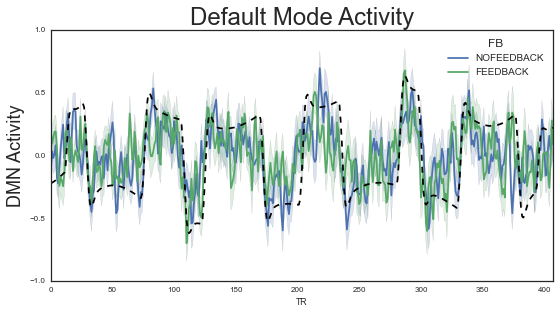

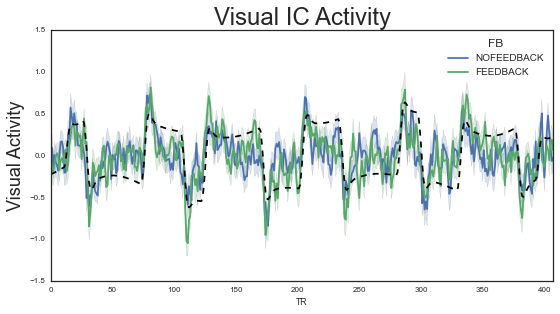

In [31]:
CCD_packages.createTimeSeriesPlots(GroupDF,goodsubj,DMN_name='RSN3',title='Default Mode Activity',ylabel='DMN Activity',figsize=(9,4.5))
CCD_packages.createTimeSeriesPlots(GroupDF,goodsubj,DMN_name='RSN0',title='Visual IC Activity',ylabel='Visual Activity',figsize=(9,4.5))

**Model Correlations for Each Subject**

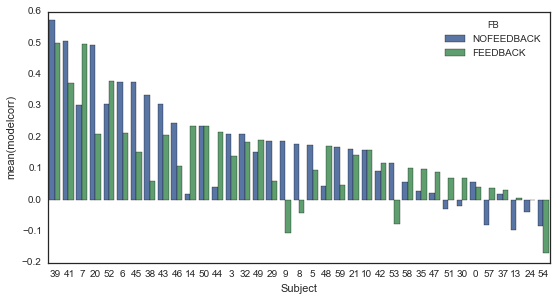

In [6]:
CCD_packages.createSubjectModelBarPlot(GroupDF,goodsubj,figsize=(9,4.5),savefig=True)

**Scan Order model correlations**

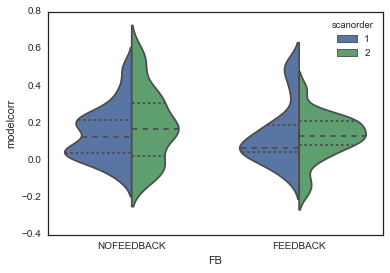

In [38]:
CCD_packages.createScanOrderBarPlot(GroupDF,goodsubj)

**Output Mean Subject Model Correlations for Default Mode Network**

In [8]:
# print 'RSN3'
CCD_packages.printModelCorrelations(GroupDF,goodsubj,'RSN3')

No Feedback Focus Correlation= -0.70
Feedback Focus Correlation= -0.57
No Feedback Wander Correlation= 0.67
Feedback Wander Correlation= 0.59
No Feedback Overall Correlation= 0.70
Feedback Overall Correlation= 0.60


In [9]:
print 'RSN0'
CCD_packages.printModelCorrelations(GroupDF,goodsubj,'RSN0')

RSN0
No Feedback Focus Correlation= -0.54
Feedback Focus Correlation= -0.67
No Feedback Wander Correlation= 0.55
Feedback Wander Correlation= 0.66
No Feedback Overall Correlation= 0.56
Feedback Overall Correlation= 0.69


In [10]:
hmFB,hmNFB,hmDiff=CCD_packages.generateHeatMaps(GroupDF,goodsubj)

**Resting State Network Connectivity Matrices**

*Taken from Dual Regression Outputs with PNAS RSN10*

In [13]:
fig=CCD_packages.heatmap2Chord(hmFB,plotName='FeedbackChordDiagram',title='Network Correlations with Feedback On',savefig=False,scale=[-1,1])
iplot(fig)

In [14]:
iplot(CCD_packages.heatmap2Chord(hmNFB,plotName='FeedbackChordDiagram',title='Network Correlations with Feedback Off',savefig=False,scale=[-1,1]))

In [15]:
from scipy.stats import ttest_1samp
from mne.stats.multi_comp import fdr_correction
from numpy import triu_indices,tril_indices
t,p=ttest_1samp(hmDiff,0,axis=2)
row,column=triu_indices(10,1)
rowl,columnl=tril_indices(10)
# sns.heatmap(t)
p05,padj=fdr_correction(p[row,column],0.05)
fdr_corrected=t.copy()
fdr_corrected[rowl,columnl]=0
fdr_corrected[row,column]=t[row,column]*p05

**Pairwise Differences between Feedback On vs. Feedback Off Resting State Network Connectivity**

In [17]:
iplot(CCD_packages.heatmap2Chord(fdr_corrected,plotName='FeedbackDiffChordDiagram',title='Network Correlations differences between Feedback On/Off',savefig=False,scale=[-10,10]))

In [19]:
predictions,coefs,performance,fb_coefs,nfb_coefs=CCD_packages.linearRegressionData(GroupDF,goodsubj,numFolds=10)

Running Feedback on Regressions
Finished...
Running Feedback off Regressions
Finished...


**10-Fold Linear Regression Model Prediction with RSN Timeseries**

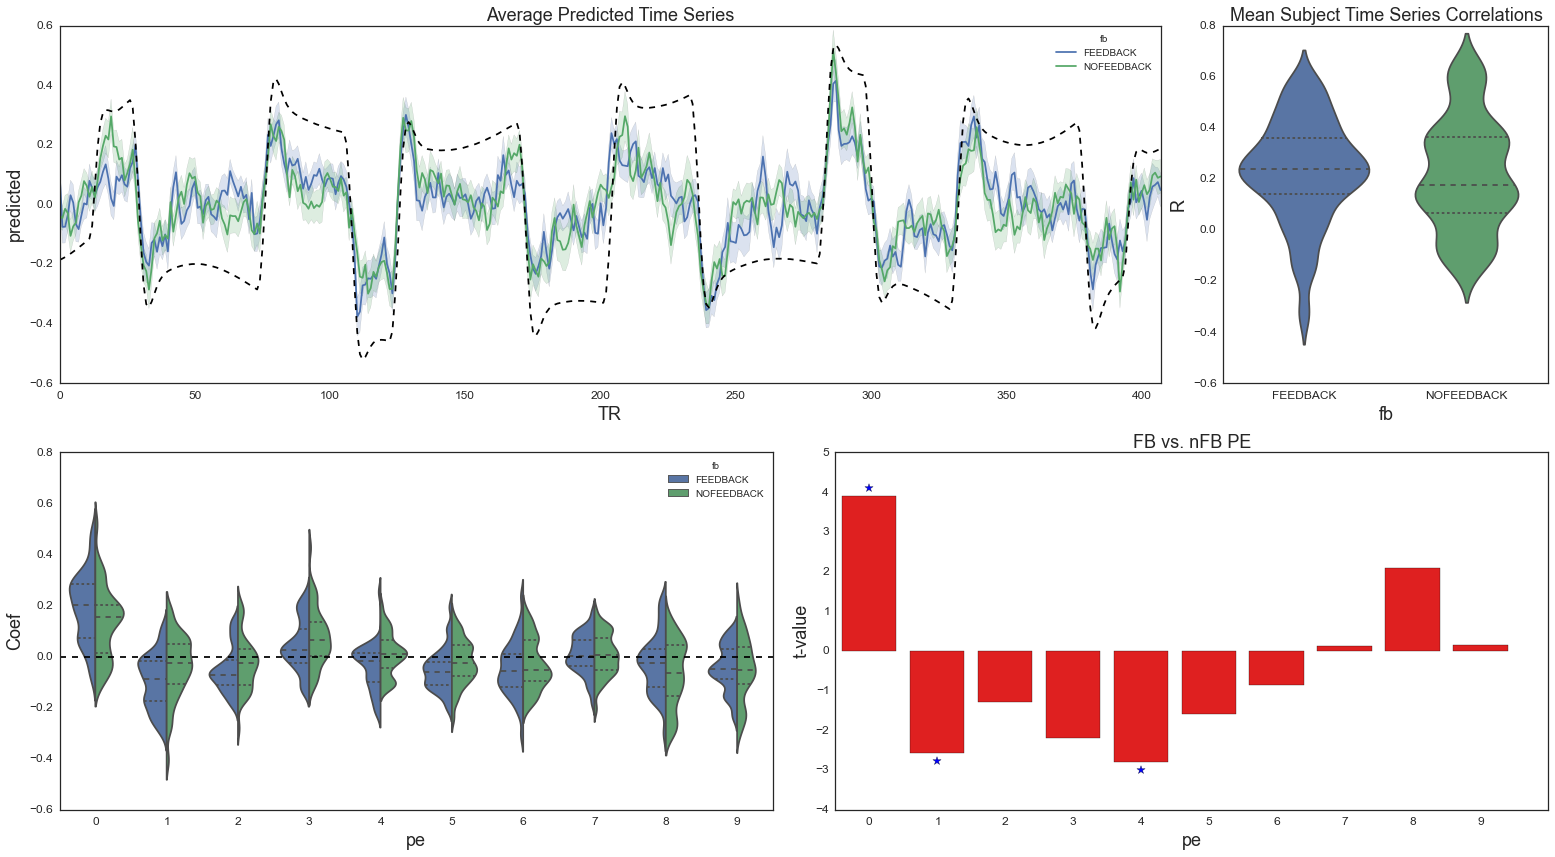

In [39]:
CCD_packages.createRegressionPlots(predictions,performance,coefs,fb_coefs,nfb_coefs,GroupDF,goodsubj)

* *-Indicates p<0.05 FDR-Corrected Feedback On vs. Feedback Off 

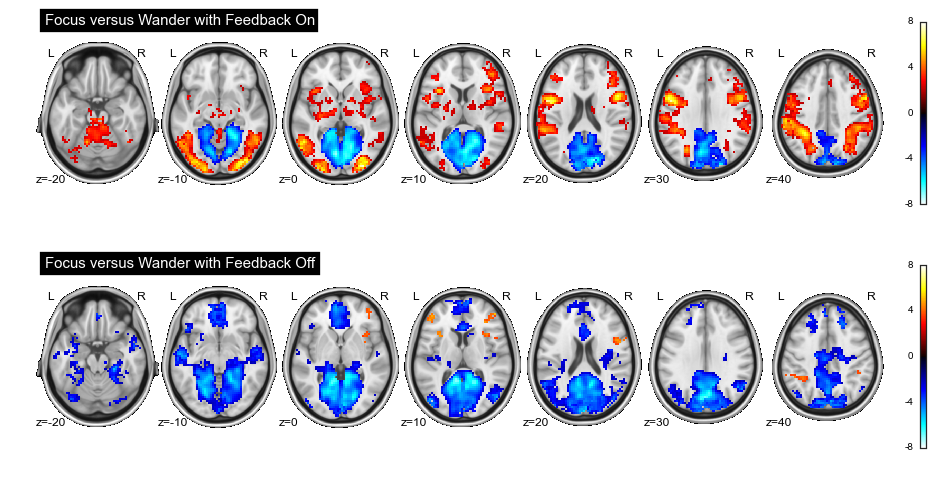

In [30]:
f, axarr = plt.subplots(2, sharex=True,figsize=(16,8))

TFCEposImg='/home/jmuraskin/Projects/CCD/working_v1/groupAnalysis/randomise/Feedback/motionThresh-0.200000/cope1/cope1/cope1_tfce_corrp_tstat1.nii.gz'
posImg='/home/jmuraskin/Projects/CCD/working_v1/groupAnalysis/randomise/Feedback/motionThresh-0.200000/cope1/cope1/cope1_tstat1.nii.gz'
TFCEnegImg='/home/jmuraskin/Projects/CCD/working_v1/groupAnalysis/randomise/Feedback/motionThresh-0.200000/cope1/cope1/cope1_tfce_corrp_tstat2.nii.gz'
negImg='/home/jmuraskin/Projects/CCD/working_v1/groupAnalysis/randomise/Feedback/motionThresh-0.200000/cope1/cope1/cope1_tstat2.nii.gz'
CCD_packages.createTFCEfMRIOverlayImages(TFCEposImg,posImg,TFCEnegImg,negImg,title='Focus versus Wander with Feedback On',plotToAxis=True,axes=axarr[0],f=f)

TFCEposImg='/home/jmuraskin/Projects/CCD/working_v1/groupAnalysis/randomise/noFeedback/motionThresh-0.200000/cope1/cope1/cope1_tfce_corrp_tstat1.nii.gz'
posImg='/home/jmuraskin/Projects/CCD/working_v1/groupAnalysis/randomise/noFeedback/motionThresh-0.200000/cope1/cope1/cope1_tstat1.nii.gz'
TFCEnegImg='/home/jmuraskin/Projects/CCD/working_v1/groupAnalysis/randomise/noFeedback/motionThresh-0.200000/cope1/cope1/cope1_tfce_corrp_tstat2.nii.gz'
negImg='/home/jmuraskin/Projects/CCD/working_v1/groupAnalysis/randomise/noFeedback/motionThresh-0.200000/cope1/cope1/cope1_tstat2.nii.gz'
CCD_packages.createTFCEfMRIOverlayImages(TFCEposImg,posImg,TFCEnegImg,negImg,title='Focus versus Wander with Feedback Off',plotToAxis=True,axes=axarr[1],f=f)

# f.tight_layout()

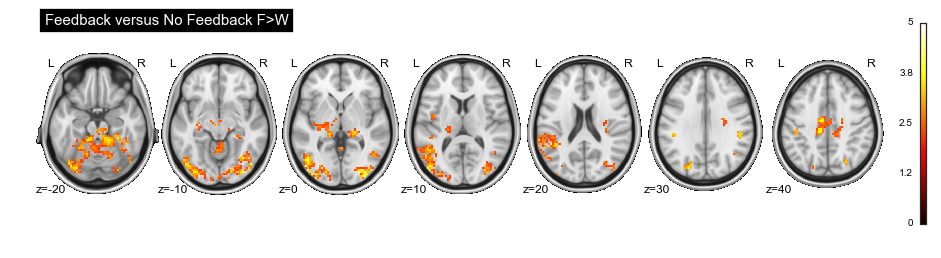

In [29]:
f, axarr = plt.subplots(1,figsize=(16,4))
TFCEposImg='/home/jmuraskin/Projects/CCD/working_v1/groupAnalysis/randomise/paired-Ttest/motionThresh-0.200000/cope1/cope1/cope1_tfce_corrp_tstat1.nii.gz'
posImg='/home/jmuraskin/Projects/CCD/working_v1/groupAnalysis/randomise/paired-Ttest/motionThresh-0.200000/cope1/cope1/cope1_tstat1.nii.gz'
TFCEnegImg='/home/jmuraskin/Projects/CCD/working_v1/groupAnalysis/randomise/paired-Ttest/motionThresh-0.200000/cope1/cope1/cope1_tfce_corrp_tstat2.nii.gz'
negImg='/home/jmuraskin/Projects/CCD/working_v1/groupAnalysis/randomise/paired-Ttest/motionThresh-0.200000/cope1/cope1/cope1_tstat2.nii.gz'
CCD_packages.createTFCEfMRIOverlayImages(TFCEposImg,posImg,TFCEnegImg,negImg,vmax=5,title='Feedback versus No Feedback F>W',plotToAxis=True,f=f,axes=axarr)
# f.tight_layout()

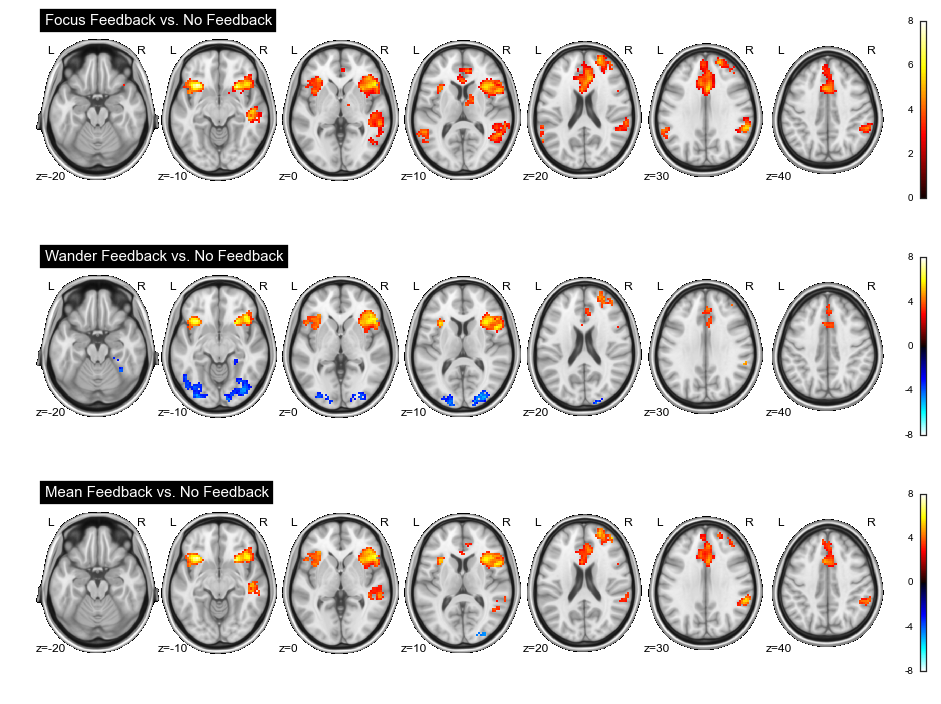

In [28]:
f, axarr = plt.subplots(3, sharex=True,figsize=(16,12))

names=['Focus','Wander','Mean']

for indx,cope in enumerate(range(3,6)):
    TFCEposImg='/home/jmuraskin/Projects/CCD/working_v1/groupAnalysis/randomise/paired-Ttest/motionThresh-0.200000/cope%d/cope%d/cope%d_tfce_corrp_tstat1.nii.gz' % (cope,cope,cope)
    posImg='/home/jmuraskin/Projects/CCD/working_v1/groupAnalysis/randomise/paired-Ttest/motionThresh-0.200000/cope%d/cope%d/cope%d_tstat1.nii.gz' % (cope,cope,cope)
    TFCEnegImg='/home/jmuraskin/Projects/CCD/working_v1/groupAnalysis/randomise/paired-Ttest/motionThresh-0.200000/cope%d/cope%d/cope%d_tfce_corrp_tstat2.nii.gz' % (cope,cope,cope)
    negImg='/home/jmuraskin/Projects/CCD/working_v1/groupAnalysis/randomise/paired-Ttest/motionThresh-0.200000/cope%d/cope%d/cope%d_tstat2.nii.gz' % (cope,cope,cope)
    CCD_packages.createTFCEfMRIOverlayImages(TFCEposImg,posImg,TFCEnegImg,negImg,title='%s Feedback vs. No Feedback' % names[indx],plotToAxis=True,axes=axarr[indx],f=f)
# f.tight_layout()

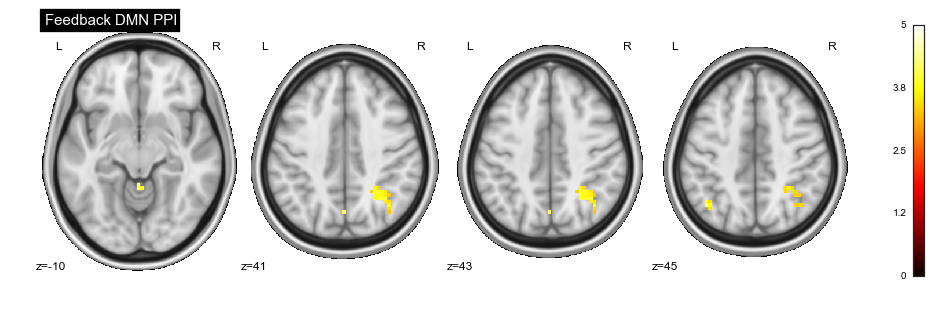

In [32]:
f, axarr = plt.subplots(1,figsize=(16,5))
TFCEposImg='/home/jmuraskin/Projects/CCD/working_v1/groupAnalysis/PPI_DMN/randomise/Feedback/motionThresh-0.200000/cope3/cope3/cope3_tfce_corrp_tstat1.nii.gz'
posImg='/home/jmuraskin/Projects/CCD/working_v1/groupAnalysis/PPI_DMN/randomise/Feedback/motionThresh-0.200000/cope3/cope3/cope3_tstat1.nii.gz'
TFCEnegImg='/home/jmuraskin/Projects/CCD/working_v1/groupAnalysis/PPI_DMN/randomise/Feedback/motionThresh-0.200000/cope3/cope3/cope3_tfce_corrp_tstat2.nii.gz'
negImg='/home/jmuraskin/Projects/CCD/working_v1/groupAnalysis/PPI_DMN/randomise/Feedback/motionThresh-0.200000/cope3/cope3/cope3_tstat2.nii.gz'
CCD_packages.createTFCEfMRIOverlayImages(TFCEposImg,posImg,TFCEnegImg,negImg,slices=[-10,41,43,45],vmax=5,title='Feedback DMN PPI',plotToAxis=True,f=f,axes=axarr)
# f.tight_layout()

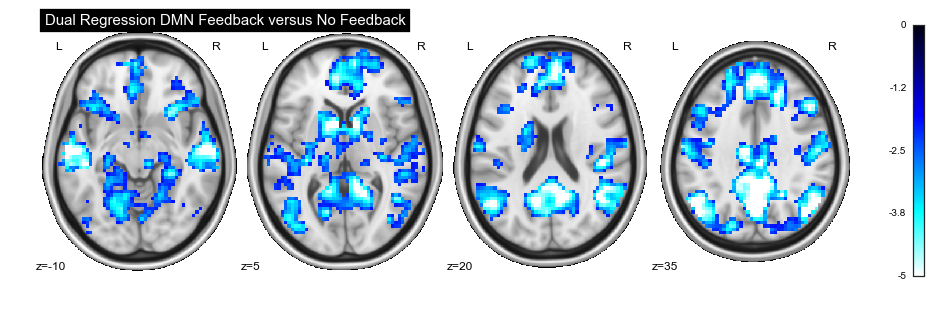

In [34]:
f, axarr = plt.subplots(1,figsize=(16,5))
TFCEposImg='/home/jmuraskin/Projects/CCD/working_v1/groupAnalysis/DMN/paired/motionThresh-0.200000/DMN_pair/paired_tfce_corrp_tstat1.nii.gz'
posImg='/home/jmuraskin/Projects/CCD/working_v1/groupAnalysis/DMN/paired/motionThresh-0.200000/DMN_pair/paired_tstat1.nii.gz'
TFCEnegImg='/home/jmuraskin/Projects/CCD/working_v1/groupAnalysis/DMN/paired/motionThresh-0.200000/DMN_pair/paired_tfce_corrp_tstat2.nii.gz'
negImg='/home/jmuraskin/Projects/CCD/working_v1/groupAnalysis/DMN/paired/motionThresh-0.200000/DMN_pair/paired_tstat2.nii.gz'
CCD_packages.createTFCEfMRIOverlayImages(TFCEposImg,posImg,TFCEnegImg,negImg,slices=range(-10,50,15),vmax=5,title='Dual Regression DMN Feedback versus No Feedback',plotToAxis=True,f=f,axes=axarr)
# f.tight_layout()

**Default Mode Regulation versus Phenotypic Measures**

*Very Preliminary*


First lets use only total scores as our independent variables to predict DMN correlation with Model

                    Robust linear Model Regression Results                    
Dep. Variable:              modelcorr   No. Observations:                   37
Model:                            RLM   Df Residuals:                       28
Method:                          IRLS   Df Model:                            8
Norm:                          HuberT                                         
Scale Est.:                       mad                                         
Cov Type:                          H1                                         
Date:                Thu, 25 Aug 2016                                         
Time:                        16:53:50                                         
No. Iterations:                    46                                         
                     coef    std err          z      P>|z|      [95.0% Conf. Int.]
----------------------------------------------------------------------------------
const              0.1224      0.216      0.

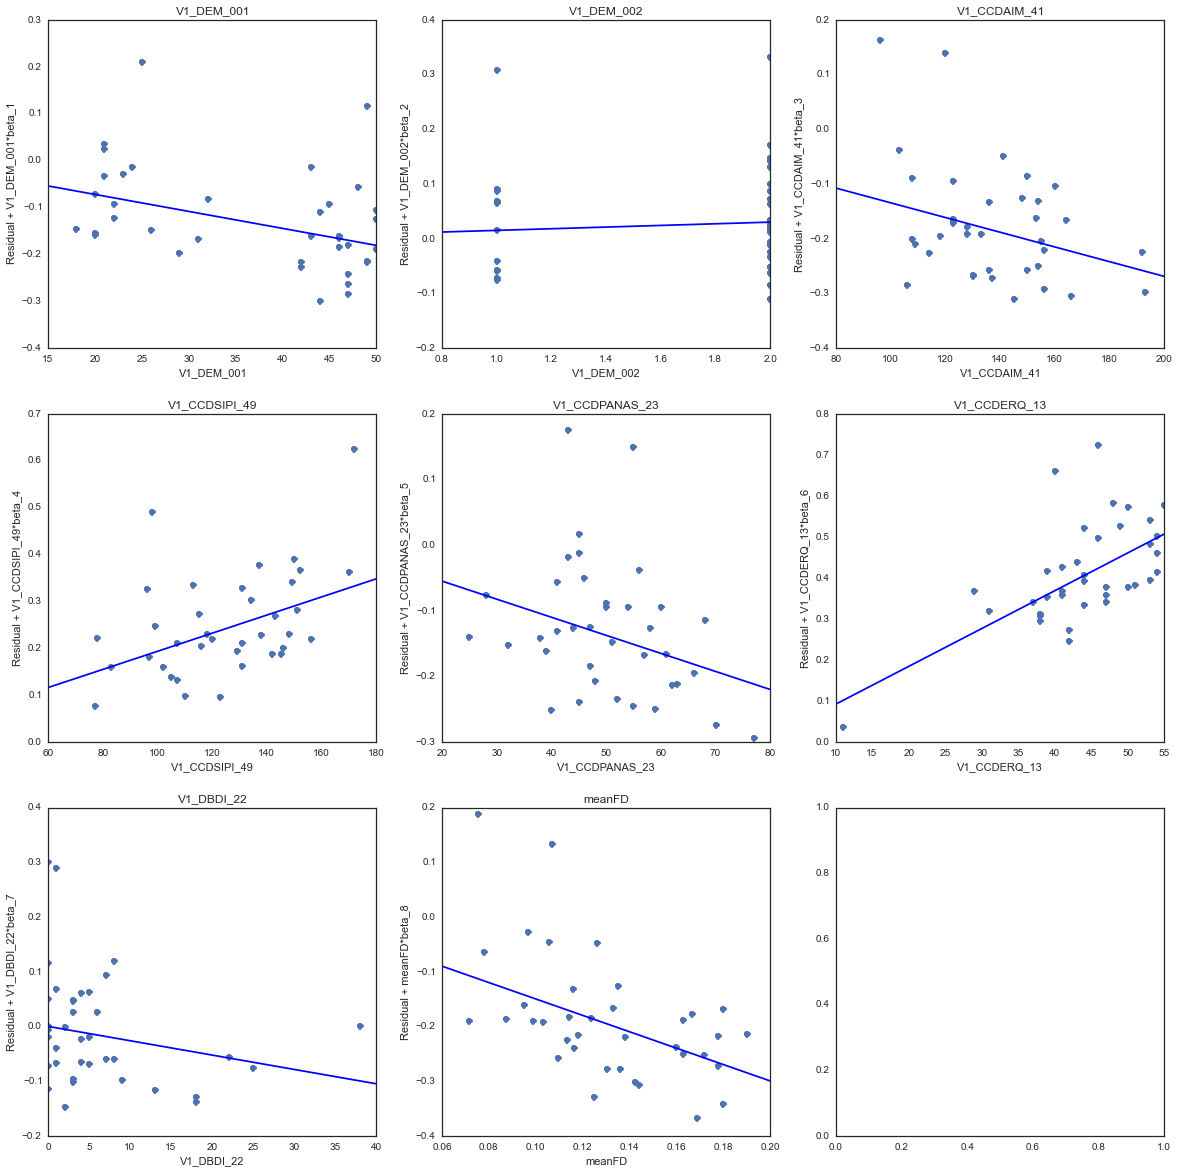

In [51]:
from pandas import read_csv
#phenotypic info
phenoFile='/home/jmuraskin/Projects/CCD/Pheno/narsad+vt_new.csv'

pheno=read_csv(phenoFile)
pheno=pheno.set_index('participant').fillna(value=0)
subject_list=goodsubj

addmotion=True
# phenoValues=['V1_DEM_001','V1_DEM_002','V1_CCDAIM_42','V1_CCDAIM_43','V1_CCDAIM_44','V1_CCDAIM_45','V1_CCDSIPI_46','V1_CCDSIPI_47','V1_CCDSIPI_48','V1_CCDRSQ_72','V1_CCDRSQ_73','V1_CCDRSQ_74','V1_CCDRSQ_75','V1_CCDPANAS_21','V1_CCDPANAS_22','V1_CCDERQ_11','V1_CCDERQ_12']
phenoValues=['V1_DEM_001','V1_DEM_002','V1_CCDAIM_41','V1_CCDSIPI_49','V1_CCDPANAS_23','V1_CCDERQ_13','V1_DBDI_22']
# phenoValues=['V1_DEM_001','V1_DEM_002','V1_CCDPANAS_21','V1_CCDPANAS_22']
# phenoValues=['V1_DEM_001','V1_DEM_002','V1_CCDAIM_42','V1_CCDAIM_43','V1_CCDAIM_44','V1_CCDAIM_45']
# phenoValues=['V1_DEM_001','V1_DEM_002','V1_CCDRSQ_72','V1_CCDRSQ_73','V1_CCDRSQ_74','V1_CCDRSQ_75']
# phenoValues=['V1_DEM_001','V1_DEM_002','V1_CCDSIPI_46','V1_CCDSIPI_47','V1_CCDSIPI_48']

modelInfo=np.arctanh(GroupDF[np.all([GroupDF.Subject_ID.isin(subject_list),GroupDF.FB=='FEEDBACK'],axis=0)].groupby('Subject_ID').mean()['modelcorr'])
motionInfo=GroupDF[np.all([GroupDF.Subject_ID.isin(subject_list),GroupDF.FB=='FEEDBACK'],axis=0)].groupby('Subject_ID').mean()['meanFD']

if addmotion:
    pheno=pheno.loc[subject_list][phenoValues]
    pheno['meanFD']=motionInfo
    modelX=pheno
else:
    modelX=pheno.loc[subject_list][phenoValues]
    
inputs=modelInfo
# inputs=array(fb_performance['R'])
# inputs=array(fb_coefs[fb_coefs.pe==3]['Coef'])
results=CCD_packages.runRLMR(inputs,modelX,phenoValues + ['meanFD'],RLM=True)


                            OLS Regression Results                            
Dep. Variable:              modelcorr   R-squared:                       0.820
Model:                            OLS   Adj. R-squared:                  0.658
Method:                 Least Squares   F-statistic:                     5.076
Date:                Thu, 25 Aug 2016   Prob (F-statistic):           0.000511
Time:                        16:55:03   Log-Likelihood:                 48.838
No. Observations:                  37   AIC:                            -61.68
Df Residuals:                      19   BIC:                            -32.68
Df Model:                          17                                         
Covariance Type:            nonrobust                                         
                     coef    std err          t      P>|t|      [95.0% Conf. Int.]
----------------------------------------------------------------------------------
const              0.1508      0.276      0.

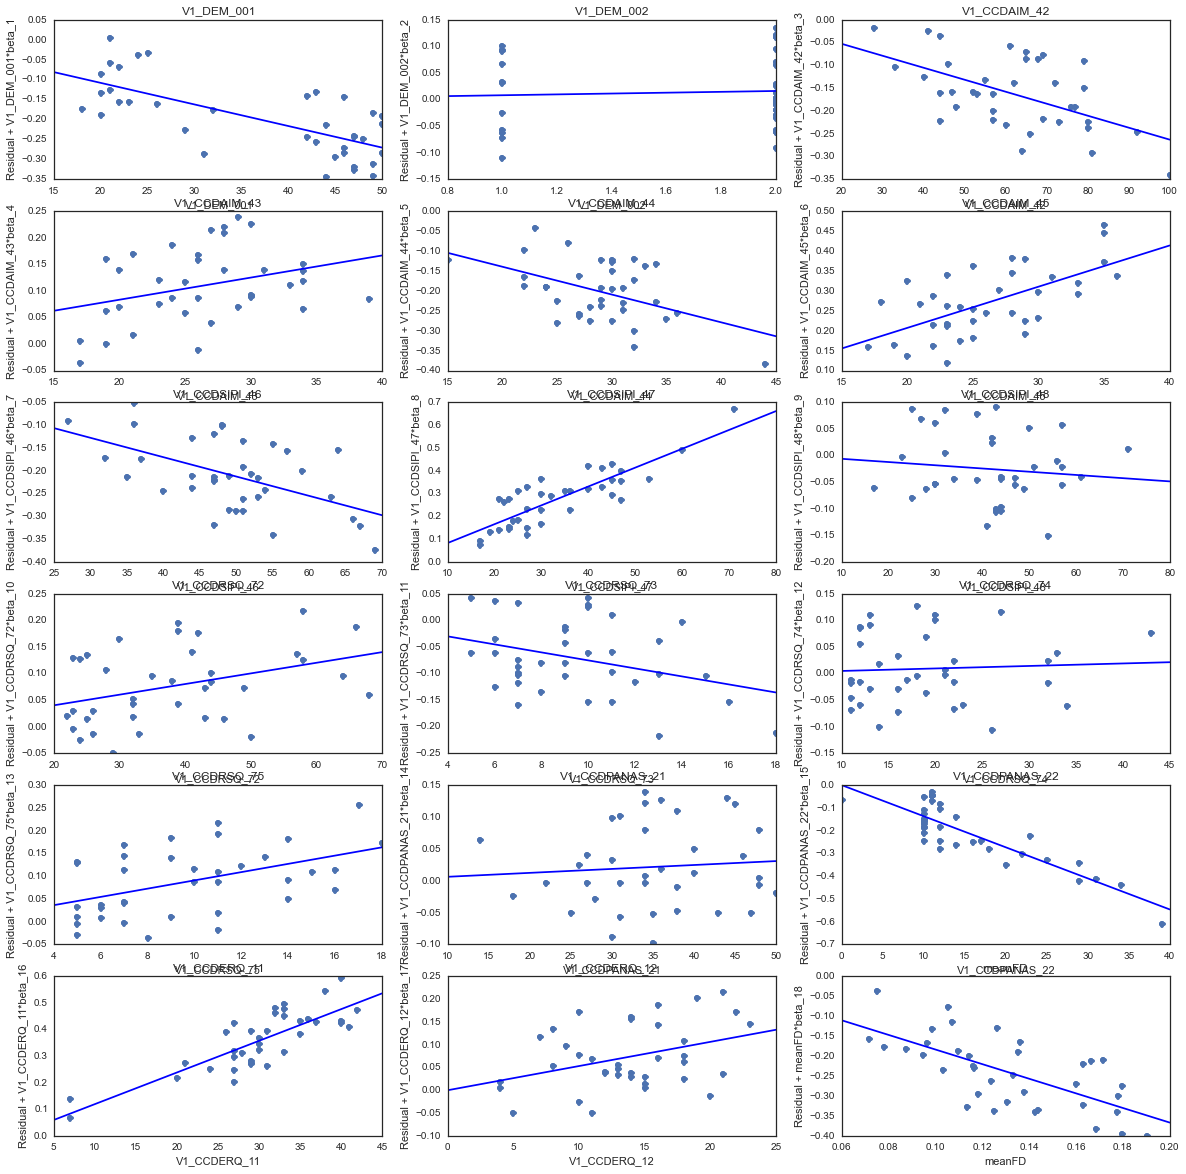

In [53]:
phenoValues=['V1_DEM_001','V1_DEM_002','V1_CCDAIM_42','V1_CCDAIM_43','V1_CCDAIM_44','V1_CCDAIM_45','V1_CCDSIPI_46','V1_CCDSIPI_47','V1_CCDSIPI_48','V1_CCDRSQ_72','V1_CCDRSQ_73','V1_CCDRSQ_74','V1_CCDRSQ_75','V1_CCDPANAS_21','V1_CCDPANAS_22','V1_CCDERQ_11','V1_CCDERQ_12']
pheno=read_csv(phenoFile)
pheno=pheno.set_index('participant').fillna(value=0)
subject_list=goodsubj
if addmotion:
    pheno=pheno.loc[subject_list][phenoValues]
    pheno['meanFD']=motionInfo
    modelX=pheno
else:
    modelX=pheno.loc[subject_list][phenoValues]
    
inputs=modelInfo
# inputs=array(fb_performance['R'])
# inputs=array(fb_coefs[fb_coefs.pe==3]['Coef'])
results=CCD_packages.runRLMR(inputs,modelX,phenoValues + ['meanFD'],RLM=False)
